In [1]:
import imagej
ij = imagej.init()

Operating in headless mode - the original ImageJ will have limited functionality.
Operating in headless mode - the IJ class will not be fully functional.
The compare_version function is deprecated. Use is_version_at_least instead.


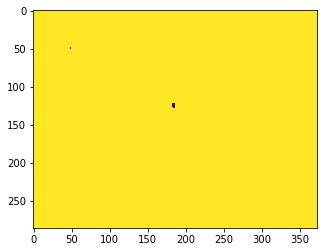

In [2]:
imp = ij.IJ.openImage('..\\binary2/1_in_2.5x-0002.png')
ij.py.show(imp)

In [3]:
PA = ij.plugin.filter.ParticleAnalyzer()

AttributeError: '_jpype._JMethod' object has no attribute 'filter'

In [13]:
ij.IJ.run(imp, "Create Selection", "")
roi = imp.getRoi()
ij.IJ.run(imp, "Close", "")

# Split the ROI into cells.
# This works because cells are disconnected due to the watershed.
rois = roi.getRois()
print(len(rois), "cells detected")

3 cells detected


In [ ]:
# import imagej
# ij = imagej.init('/Applications/Fiji.app')
# from ij import IJ, ImagePlus
# from ij.plugin.filter import ParticleAnalyzer as PA
# from ij.measure import ResultsTable
 
imp = ij.IJ.getImage()
PA = ij.plugin.filter.ParticleAnalyzer()
 
MAXSIZE = 10000;
MINSIZE = 100;
options = PA.SHOW_ROI_MASKS \
	+ PA.EXCLUDE_EDGE_PARTICLES \
	+ PA.INCLUDE_HOLES \
	+ PA.SHOW_RESULTS
rt = ij.measure.ResultsTable()
p = PA(options, PA.AREA + PA.STACK_POSITION, rt, MINSIZE, MAXSIZE)
p.setHideOutputImage(True)
stk = ImageStack(imp.getWidth(), imp.getHeight())
 
for i in range(imp.getStackSize()):
	imp.setSliceWithoutUpdate(i + 1)
	p.analyze(imp)
	mmap = p.getOutputImage()
	stk.addSlice(mmap.getProcessor())
 
ImagePlus("tt", stk).show()